In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import numpy as np

/home/flagship/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/flagship/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/flagship/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/flagship/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

In [2]:
from numpy import genfromtxt
sorData = genfromtxt('data.csv', delimiter=',')

In [3]:
sorData = sorData[1:,:5]

In [4]:
sorData = np.take(sorData,np.random.permutation(sorData.shape[0]),axis=0,out=sorData)

In [19]:
sorData = np.asarray(sorData)

print(sorData.shape)

sortDataX = sorData[:,:4].astype(int)
sortDataY = sorData[:,4].astype(int)



(200, 5)


In [35]:
model = tf.keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[sortDataX.shape[1]]),
    layers.Dense(4, activation='relu'),
    layers.Dense(5,activation='softmax')
  ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 25        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [37]:
sortDataX.shape

(200, 4)

In [38]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
  sortDataX, sortDataY,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [39]:
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()



,loss,acc,val_loss,val_acc,epoch
995,0.518830,0.8375,0.718578,0.8,995
996,0.517301,0.8375,0.718417,0.8,996
997,0.515696,0.8375,0.720837,0.8,997
998,0.516000,0.8375,0.719558,0.8,998
999,0.516891,0.8375,0.716851,0.8,999


KeyError: 'mean_absolute_error'

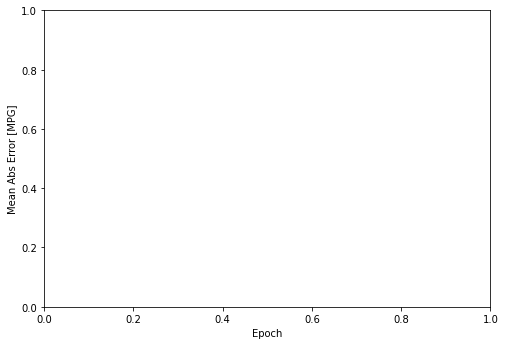

In [58]:
import matplotlib.pyplot as plt

# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mean_absolute_error'],
#            label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
#            label = 'Val Error')
#     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mean_squared_error'],
#            label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mean_squared_error'],
#            label = 'Val Error')
#     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

# plot_history(history)

In [44]:
dummy = [[2,20,1,1]]
dummy=np.asarray(dummy)
res = model.predict(dummy)
res.shape

(1, 5)

In [45]:
result = model.predict(np.array([sortDataX[0]]))

In [46]:
np.set_printoptions(suppress=True)

In [49]:
np.argmax(res)

2